In [1]:
import pandas as pd
import numpy as np
import pydotplus
from IPython.display import Image  
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder

In [2]:
trans = pd.read_csv("F:\Kaggle\IEEE_CIS\Data\\train_transaction.csv", nrows=1000)
Train = trans.loc[0:499]

In [3]:
X1 = Train[['TransactionAmt']].to_numpy()
X2 = Train[['ProductCD']].to_numpy()
X3 = Train[['card4']].to_numpy()
y = Train[['isFraud']].to_numpy()

In [4]:
# Ordinal Encoder for categorical variables (X2 and X3)
enc2 = OrdinalEncoder()
enc3 = OrdinalEncoder()
enc2.fit(X2)
enc3.fit(X3)
enc2.categories_
enc3.categories_
X2_ecd = enc2.transform(X2)
X3_ecd = enc3.transform(X3)


X = np.concatenate((X1,X2_ecd,X3_ecd),axis=1)

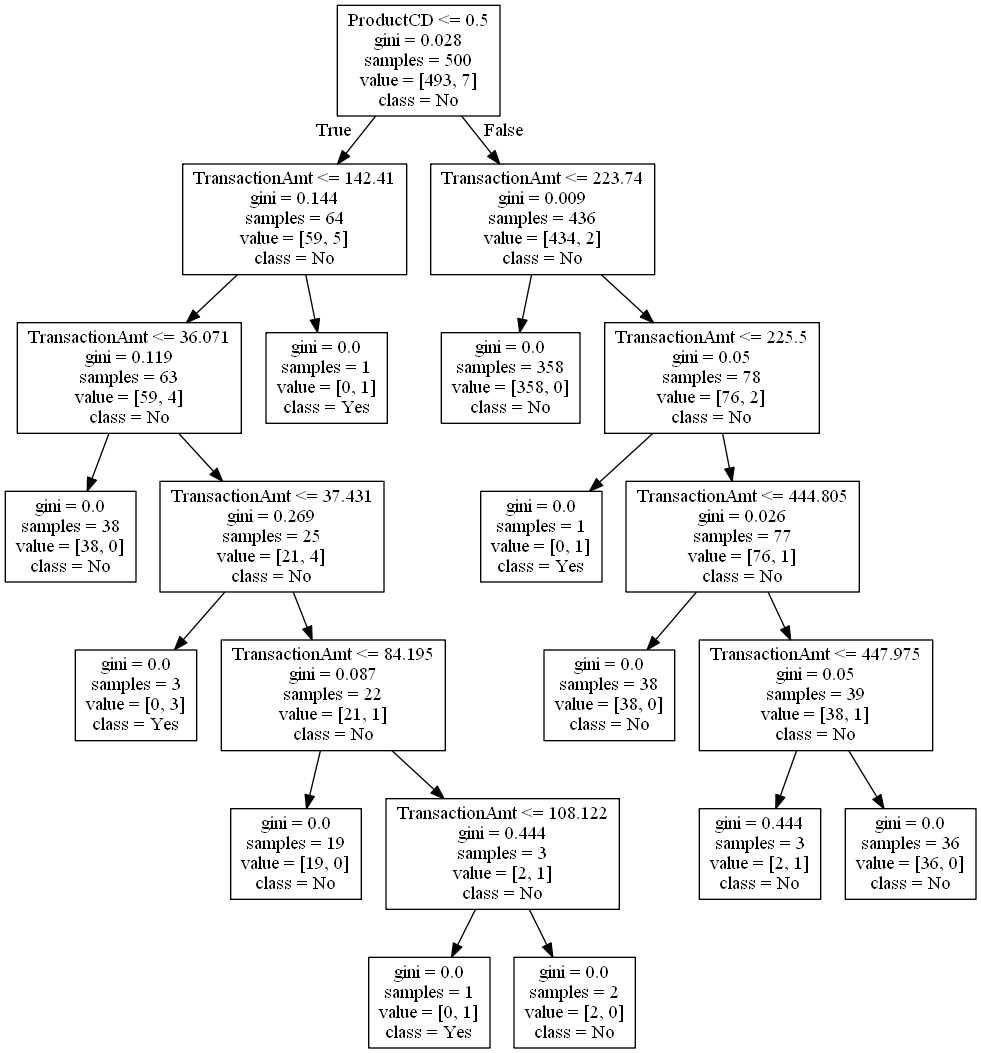

In [5]:
# Create decision tree classifer object
clf = DecisionTreeClassifier(random_state=0)
# Train model
model = clf.fit(X, y)
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=np.asarray(['TransactionAmt', 'ProductCD', 'card4']),  
                                class_names=np.asarray(['No', 'Yes']))

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
# Show graph
Image(graph.create_png())

In [6]:
# Testing Data
Test = trans.loc[500:999]

X1 = Test[['TransactionAmt']].to_numpy()
X2 = Test[['ProductCD']].to_numpy()
X3 = Test[['card4']].to_numpy()
y = Test[['isFraud']].to_numpy()

# Ordinal Encoder for categorical variables (X2 and X3)
enc2 = OrdinalEncoder()
enc3 = OrdinalEncoder()
enc2.fit(X2)
enc3.fit(X3)
enc2.categories_
enc3.categories_
X2_ecd = enc2.transform(X2)
X3_ecd = enc3.transform(X3)


X = np.concatenate((X1,X2_ecd,X3_ecd),axis=1)

In [7]:
# Predict
y_hat = clf.predict(X)

# Prediction performance
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y, y_hat).ravel()
(tn, fp, fn, tp)

(479, 13, 8, 0)